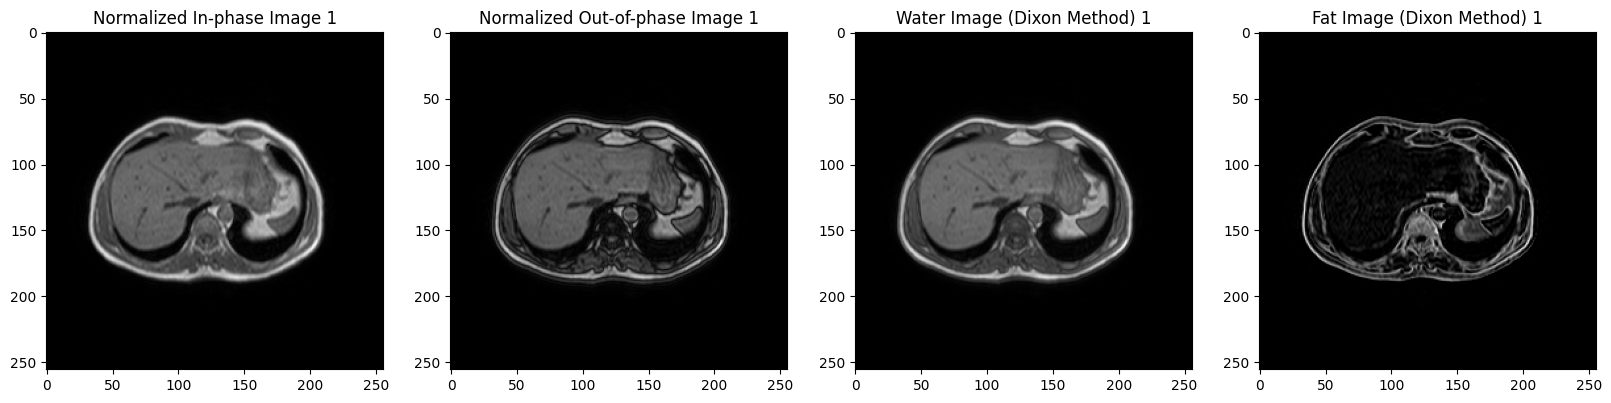

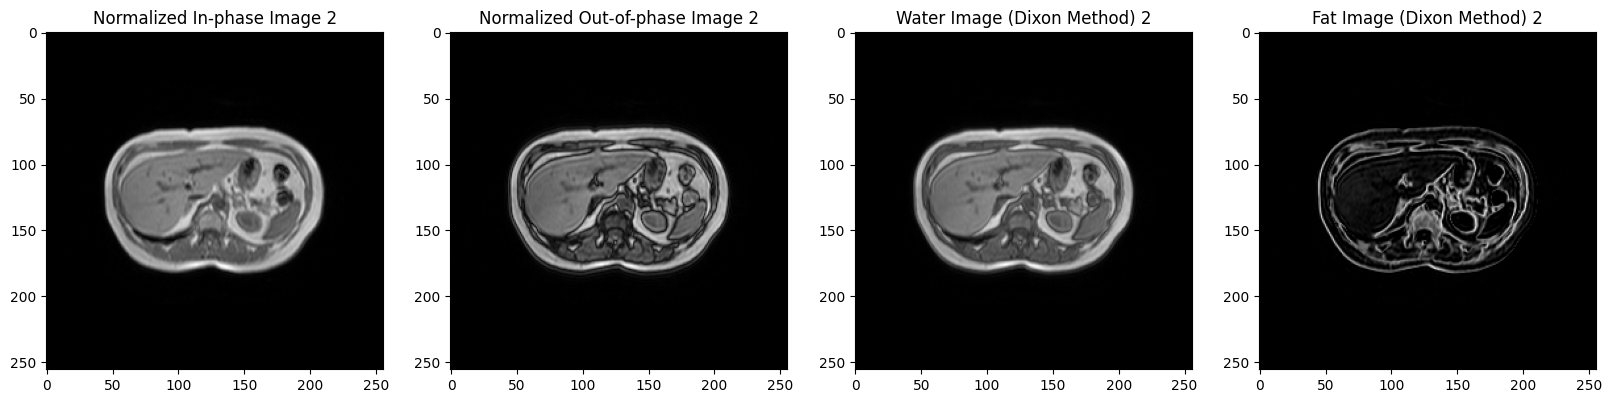

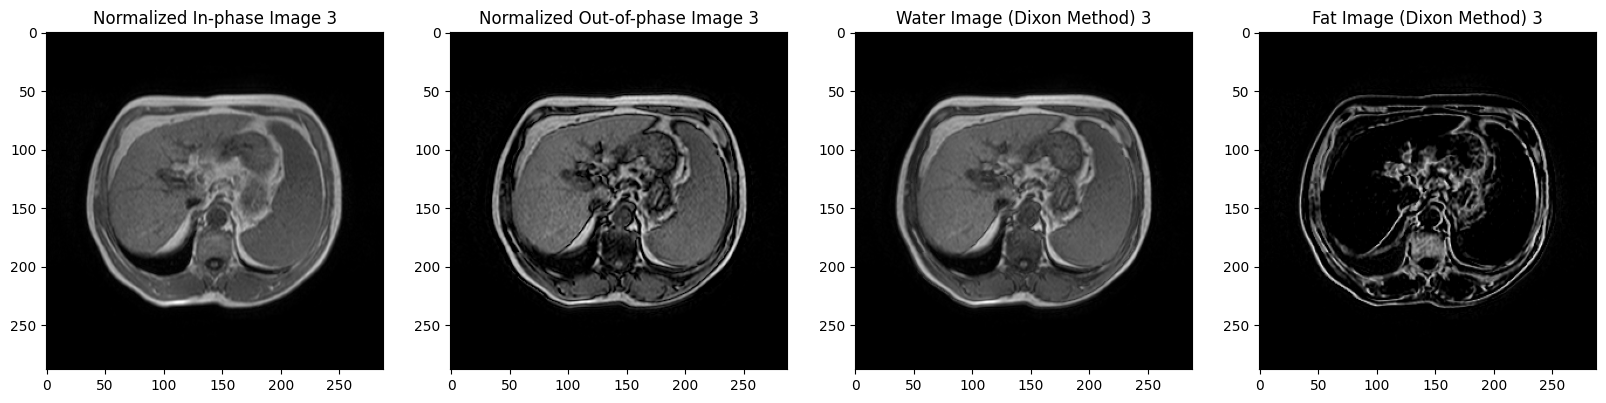

In [3]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt

def load_dicom_image(file_path):
    """Load a DICOM file and return the pixel array along with metadata."""
    dicom = pydicom.dcmread(file_path)
    return dicom.pixel_array.astype(np.float32), dicom

def normalize_image(image):
    """Normalize the image to the range [0, 1]."""
    image_min = np.min(image)
    image_max = np.max(image)
    normalized_image = (image - image_min) / (image_max - image_min)
    return normalized_image

def apply_threshold(image, threshold=0):
    """Apply a threshold to set intensity values below the threshold to zero."""
    thresholded_image = np.where(image < threshold, 0, image)
    return thresholded_image

def dixon_method(inphase_img, outphase_img):
    """Calculate water and fat images using the Dixon method."""
    # Calculate water and fat images
    water_img = (inphase_img + outphase_img) / 2
    fat_img = (inphase_img - outphase_img) / 2
    
    # Apply threshold to keep the background black in the fat image
    fat_img = apply_threshold(fat_img)
    
    return water_img, fat_img

# List of file paths for in-phase and out-of-phase images
inphase_file_paths = [
    '1\IMG-0004-00070.dcm',
    '2\IMG-0046-00052.dcm',
    '3\IMG-0004-00032.dcm'
]

outphase_file_paths = [
    '1\IMG-0004-00069.dcm',
    '2\IMG-0046-00051.dcm',
    '3\IMG-0004-00031.dcm'
]

for i in range(len(inphase_file_paths)):
    # Load DICOM files
    inphase_img, inphase_dicom = load_dicom_image(inphase_file_paths[i])
    outphase_img, outphase_dicom = load_dicom_image(outphase_file_paths[i])

    # Normalize in-phase and out-of-phase images
    inphase_img = normalize_image(inphase_img)
    outphase_img = normalize_image(outphase_img)

    # Perform water and fat suppression using Dixon method
    water_img, fat_img = dixon_method(inphase_img, outphase_img)

    # Display the results
    plt.figure(figsize=(20, 5))

    plt.subplot(1, 4, 1)
    plt.title(f'Normalized In-phase Image {i+1}')
    plt.imshow(inphase_img, cmap='gray')

    plt.subplot(1, 4, 2)
    plt.title(f'Normalized Out-of-phase Image {i+1}')
    plt.imshow(outphase_img, cmap='gray')

    plt.subplot(1, 4, 3)
    plt.title(f'Water Image (Dixon Method) {i+1}')
    plt.imshow(water_img, cmap='gray')

    plt.subplot(1, 4, 4)
    plt.title(f'Fat Image (Dixon Method) {i+1}')
    plt.imshow(fat_img, cmap='gray')

    plt.show()